In [1]:
import pandas_datareader as pdr
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import dates as d
from sklearn import linear_model,model_selection
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

tsla = pdr.get_data_yahoo("TSLA",start = start,end = end)
tsla
# tsla.to_csv("tsla.csv")
# pd.read_csv("tsla.csv",parse_dates = True,index_col=0)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000
...,...,...,...,...,...,...
2022-08-29,287.739990,280.700012,282.829987,284.820007,41864700.0,284.820007
2022-08-30,288.480011,272.649994,287.869995,277.700012,50541800.0,277.700012
2022-08-31,281.250000,271.809998,280.619995,275.609985,52107300.0,275.609985


<AxesSubplot:xlabel='Date'>

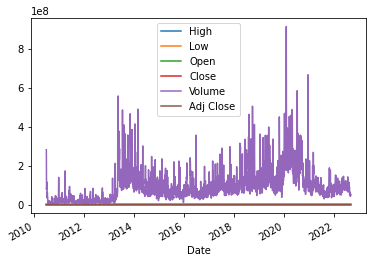

In [3]:
tsla.plot()

In [4]:
tsla["100M-AVG"] = tsla["Adj Close"].rolling(window = 100, min_periods = 0).mean()

In [5]:
tsla

,High,Low,Open,Close,Volume,Adj Close,100M-AVG
Date,,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667,1.590667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000,1.548445
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000,1.481333
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000,1.399867
...,...,...,...,...,...,...,...
2022-08-29,287.739990,280.700012,282.829987,284.820007,41864700.0,284.820007,270.729734
2022-08-30,288.480011,272.649994,287.869995,277.700012,50541800.0,277.700012,270.020868
2022-08-31,281.250000,271.809998,280.619995,275.609985,52107300.0,275.609985,269.252767


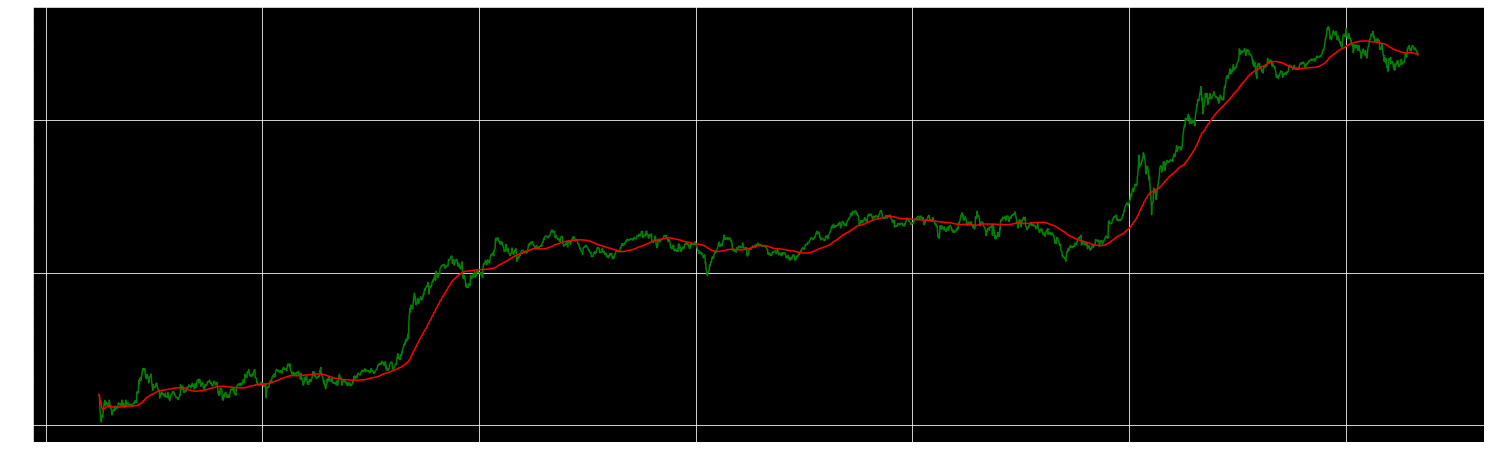

In [6]:
plt.figure(figsize = (26,8))
style.use("dark_background")
plt.grid(True)
plt.yscale("log")
plt.plot(tsla["Adj Close"],color="green")
plt.plot(tsla["100M-AVG"],color="red")

In [7]:
tsla_ohlc = tsla["Adj Close"].resample("10D").ohlc() # ohlc -> open high low close
tsla_ohlc

,open,high,low,close
Date,,,,
2010-06-29,1.592667,1.592667,1.053333,1.164000
2010-07-09,1.160000,1.376000,1.136667,1.376000
2010-07-19,1.460667,1.460667,1.348000,1.381333
2010-07-29,1.356667,1.463333,1.306000,1.306000
2010-08-08,1.306667,1.306667,1.173333,1.276667
...,...,...,...,...
2022-07-16,240.546661,272.243347,240.546661,268.433319
2022-07-26,258.859985,308.633331,258.859985,308.633331
2022-08-05,288.170013,300.029999,283.333344,300.029999


In [8]:
tsla_vol = tsla["Volume"].resample("10D").sum()
tsla_vol

Date
2010-06-29    1.062180e+09
2010-07-09    2.923425e+08
2010-07-19    1.377720e+08
2010-07-29    8.163900e+07
2010-08-08    7.725450e+07
                  ...     
2022-07-16    5.618703e+08
2022-07-26    6.999345e+08
2022-08-05    5.431425e+08
2022-08-15    5.322453e+08
2022-08-25    3.599469e+08
Freq: 10D, Name: Volume, Length: 445, dtype: float64